## Iris dataset - Random Forest
### Overview
The project classify the Iris flower species using the Random Forest algorithm.
The Iris dataset consists of four features: sepal length, sepal width, petal length, and petal width,
which are used to predict one of three Iris species: setosa, versicolor, and virginica.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

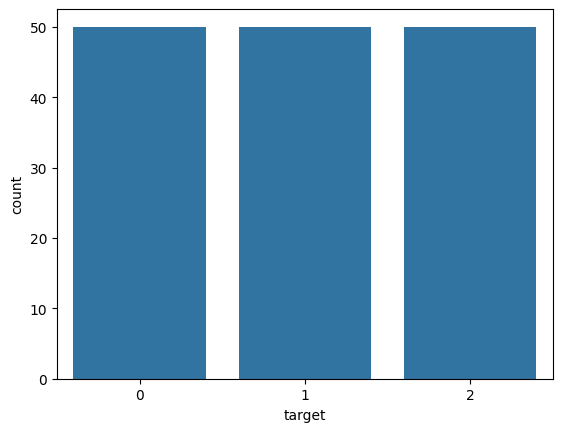

In [10]:
sns.countplot(x='target', data=df)

In [11]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [12]:
X = df.drop(['target'], axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [52]:
y_train.shape, y_test.shape

((105,), (45,))

In [65]:
from sklearn.ensemble import RandomForestClassifier

fr = RandomForestClassifier(n_estimators=100)

fr.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_predict = fr.predict(X_test)
y_predict

array([0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       1])

In [67]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f"The Accuracy is: {accuracy: .2f}")

The Accuracy is:  0.98


In [68]:
fr.score(X_test,y_test)

0.9777777777777777

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.92      0.96        13
           2       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [70]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_predict))

[[14  0  0]
 [ 0 12  1]
 [ 0  0 18]]


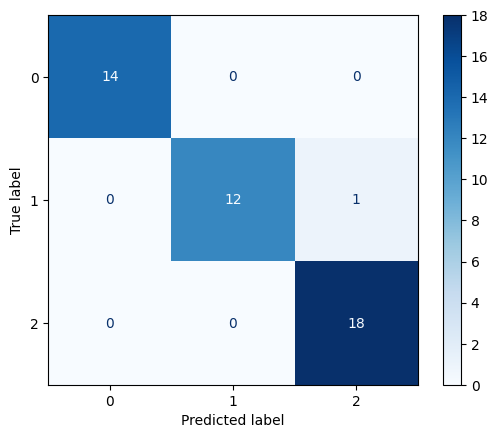

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict, cmap='Blues')

In [72]:
imp_features = pd.Series(fr.feature_importances_, index=iris.feature_names)
imp_features

sepal length (cm)    0.092258
sepal width (cm)     0.041059
petal length (cm)    0.431760
petal width (cm)     0.434923
dtype: float64